In [43]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [45]:
taxi_data=pd.read_csv('taxi_tripdata.csv')

/var/folders/br/kn0p5yrn6d771z_m2v7qll780000gp/T/ipykernel_88184/129296342.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  taxi_data=pd.read_csv('taxi_tripdata.csv')


In [52]:
taxi_data.head(300)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1.0,2021-07-01 00:30:52,2021-07-01 00:35:36,N,1.0,74,168,1.0,1.20,6.0,0.5,0.5,0.00,0.0,NaN,0.3,7.30,2.0,1.0,0.00
1,2.0,2021-07-01 00:25:36,2021-07-01 01:01:31,N,1.0,116,265,2.0,13.69,42.0,0.5,0.5,0.00,0.0,NaN,0.3,43.30,2.0,1.0,0.00
2,2.0,2021-07-01 00:05:58,2021-07-01 00:12:00,N,1.0,97,33,1.0,0.95,6.5,0.5,0.5,2.34,0.0,NaN,0.3,10.14,1.0,1.0,0.00
3,2.0,2021-07-01 00:41:40,2021-07-01 00:47:23,N,1.0,74,42,1.0,1.24,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,2.0,1.0,0.00
4,2.0,2021-07-01 00:51:32,2021-07-01 00:58:46,N,1.0,42,244,1.0,1.10,7.0,0.5,0.5,0.00,0.0,NaN,0.3,8.30,2.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2.0,2021-07-01 09:33:10,2021-07-01 09:48:15,N,1.0,74,239,1.0,3.09,12.5,0.0,0.5,3.21,0.0,NaN,0.3,19.26,1.0,1.0,2.75
296,2.0,2021-07-01 09:58:43,2021-07-01 10:12:15,N,1.0,166,236,1.0,2.91,12.0,0.0,0.5,3.20,0.0,NaN,0.3,16.00,1.0,1.0,0.00
297,2.0,2021-07-01 09:21:54,2021-07-01 09:37:12,N,1.0,244,166,1.0,4.02,15.0,0.0,0.5,0.00,0.0,NaN,0.3,15.80,1.0,1.0,0.00
298,2.0,2021-07-01 09:56:56,2021-07-01 10:10:48,N,1.0,49,256,1.0,1.83,10.5,0.0,0.5,0.00,0.0,NaN,0.3,11.30,2.0,1.0,0.00


In [46]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83691 entries, 0 to 83690
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               51173 non-null  float64
 1   lpep_pickup_datetime   83691 non-null  object 
 2   lpep_dropoff_datetime  83691 non-null  object 
 3   store_and_fwd_flag     51173 non-null  object 
 4   RatecodeID             51173 non-null  float64
 5   PULocationID           83691 non-null  int64  
 6   DOLocationID           83691 non-null  int64  
 7   passenger_count        51173 non-null  float64
 8   trip_distance          83691 non-null  float64
 9   fare_amount            83691 non-null  float64
 10  extra                  83691 non-null  float64
 11  mta_tax                83691 non-null  float64
 12  tip_amount             83691 non-null  float64
 13  tolls_amount           83691 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [47]:
taxi_data.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,51173.000000,51173.000000,83691.000000,83691.000000,51173.000000,83691.000000,83691.000000,83691.000000,83691.000000,83691.000000,83691.000000,0.0,83691.000000,83691.000000,51173.000000,51173.000000,51173.000000
mean,1.851113,1.159244,108.362572,133.270005,1.307858,194.354699,20.388305,1.156707,0.293562,1.058618,0.624529,NaN,0.297745,24.204836,1.421726,1.034393,0.642815
std,0.355981,0.773260,70.370170,77.216791,0.984362,4405.549221,15.583552,1.367897,0.247773,2.368771,1.990481,NaN,0.031219,17.262183,0.511146,0.182239,1.164219
min,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,-150.000000,-4.500000,-0.500000,-1.140000,0.000000,NaN,-0.300000,-150.300000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,56.000000,69.000000,1.000000,1.350000,9.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.300000,11.760000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,132.000000,1.000000,2.760000,16.000000,0.500000,0.500000,0.000000,0.000000,NaN,0.300000,19.800000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,166.000000,205.000000,1.000000,6.200000,26.830000,2.750000,0.500000,1.660000,0.000000,NaN,0.300000,31.300000,2.000000,1.000000,0.000000
max,2.000000,5.000000,265.000000,265.000000,32.000000,260517.930000,480.000000,8.250000,0.500000,87.710000,30.050000,NaN,0.300000,480.310000,5.000000,2.000000,2.750000


In [49]:
avg_tripdist = taxi_data['trip_distance'].mean()
print(f'Average pf trip distance is {avg_tripdist} ')

Average pf trip distance is 194.35469931055908 


In [7]:
taxi_data.drop('ehail_fee',axis=1, inplace=True)

In [9]:
taxi_data.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1.0,2021-07-01 00:30:52,2021-07-01 00:35:36,N,1.0,74,168,1.0,1.20,6.0,0.5,0.5,0.00,0.0,0.3,7.30,2.0,1.0,0.0
1,2.0,2021-07-01 00:25:36,2021-07-01 01:01:31,N,1.0,116,265,2.0,13.69,42.0,0.5,0.5,0.00,0.0,0.3,43.30,2.0,1.0,0.0
2,2.0,2021-07-01 00:05:58,2021-07-01 00:12:00,N,1.0,97,33,1.0,0.95,6.5,0.5,0.5,2.34,0.0,0.3,10.14,1.0,1.0,0.0
3,2.0,2021-07-01 00:41:40,2021-07-01 00:47:23,N,1.0,74,42,1.0,1.24,6.5,0.5,0.5,0.00,0.0,0.3,7.80,2.0,1.0,0.0
4,2.0,2021-07-01 00:51:32,2021-07-01 00:58:46,N,1.0,42,244,1.0,1.10,7.0,0.5,0.5,0.00,0.0,0.3,8.30,2.0,1.0,0.0


In [11]:
taxi_data.dropna(inplace= True)

In [12]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51173 entries, 0 to 51172
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               51173 non-null  float64
 1   lpep_pickup_datetime   51173 non-null  object 
 2   lpep_dropoff_datetime  51173 non-null  object 
 3   store_and_fwd_flag     51173 non-null  object 
 4   RatecodeID             51173 non-null  float64
 5   PULocationID           51173 non-null  int64  
 6   DOLocationID           51173 non-null  int64  
 7   passenger_count        51173 non-null  float64
 8   trip_distance          51173 non-null  float64
 9   fare_amount            51173 non-null  float64
 10  extra                  51173 non-null  float64
 11  mta_tax                51173 non-null  float64
 12  tip_amount             51173 non-null  float64
 13  tolls_amount           51173 non-null  float64
 14  improvement_surcharge  51173 non-null  float64
 15  total_a

In [98]:
taxi_data['lpep_dropoff_datetime'] = pd.to_datetime(taxi_data['lpep_dropoff_datetime'])
taxi_data['lpep_pickup_datetime']= pd.to_datetime(taxi_data['lpep_pickup_datetime'])

In [99]:
taxi_data['trip_duration']=taxi_data['lpep_dropoff_datetime']-taxi_data['lpep_pickup_datetime']

In [100]:
col_time = taxi_data.pop('trip_duration')

# Insert column 'C' at the beginning
taxi_data.insert(3, 'trip_duration', col_time)
taxi_data.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1.0,2021-07-01 00:30:52,2021-07-01 00:35:36,0 days 00:04:44,N,1.0,74,168,1.0,1.20,...,0.5,0.5,0.00,0.0,NaN,0.3,7.30,2.0,1.0,0.0
1,2.0,2021-07-01 00:25:36,2021-07-01 01:01:31,0 days 00:35:55,N,1.0,116,265,2.0,13.69,...,0.5,0.5,0.00,0.0,NaN,0.3,43.30,2.0,1.0,0.0
2,2.0,2021-07-01 00:05:58,2021-07-01 00:12:00,0 days 00:06:02,N,1.0,97,33,1.0,0.95,...,0.5,0.5,2.34,0.0,NaN,0.3,10.14,1.0,1.0,0.0
3,2.0,2021-07-01 00:41:40,2021-07-01 00:47:23,0 days 00:05:43,N,1.0,74,42,1.0,1.24,...,0.5,0.5,0.00,0.0,NaN,0.3,7.80,2.0,1.0,0.0
4,2.0,2021-07-01 00:51:32,2021-07-01 00:58:46,0 days 00:07:14,N,1.0,42,244,1.0,1.10,...,0.5,0.5,0.00,0.0,NaN,0.3,8.30,2.0,1.0,0.0


In [21]:
taxi_data['VendorID'].value_counts()

VendorID
2.0    43554
1.0     7619
Name: count, dtype: int64

In [93]:
def drop_max_until_below(df, column_name, threshold):
    """
    Drops the row with the maximum value in the specified column until the maximum value is below the threshold.

    Parameters:
    df (pd.DataFrame): The DataFrame from which to drop rows.
    column_name (str): The name of the column to check for the maximum value.
    threshold (numeric): The value below which the maximum value should be.

    Returns:
    pd.DataFrame: The DataFrame with rows dropped.
    """
    while df[column_name].max() >= threshold:
        max_index = df[column_name].idxmax()
        df = df.drop(max_index)
    return df

taxi_data = drop_max_until_below(taxi_data, 'trip_distance', 200)


In [85]:
max_index = taxi_data['trip_distance'].idxmax()

# Drop the row with the maximum value in column 'B'
taxi_data = taxi_data.drop(max_index)


In [94]:
taxi_data.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,51173.000000,51173.000000,83464.000000,83464.000000,51173.000000,83464.000000,83464.000000,83464.000000,83464.000000,83464.000000,83464.000000,0.0,83464.000000,83464.000000,51173.000000,51173.000000,51173.000000
mean,1.851113,1.159244,108.323373,133.309750,1.307858,4.748693,20.361566,1.153528,0.294360,1.060161,0.622504,NaN,0.297739,24.176014,1.421726,1.034393,0.642815
std,0.355981,0.773260,70.357827,77.222373,0.984362,5.329710,15.577609,1.366918,0.247636,2.370023,1.987840,NaN,0.031261,17.255963,0.511146,0.182239,1.164219
min,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,-150.000000,-4.500000,-0.500000,-1.140000,0.000000,NaN,-0.300000,-150.300000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,56.000000,69.000000,1.000000,1.350000,9.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.300000,11.760000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,132.000000,1.000000,2.740000,16.000000,0.500000,0.500000,0.000000,0.000000,NaN,0.300000,19.800000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,166.000000,205.000000,1.000000,6.160000,26.750000,2.750000,0.500000,1.660000,0.000000,NaN,0.300000,31.270000,2.000000,1.000000,0.000000
max,2.000000,5.000000,265.000000,265.000000,32.000000,109.870000,480.000000,8.250000,0.500000,87.710000,30.050000,NaN,0.300000,480.310000,5.000000,2.000000,2.750000


In [23]:
numeric_cols= taxi_data.select_dtypes(float)
numeric_cols.corr()

,VendorID,RatecodeID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
VendorID,1.000000,0.014928,0.060150,0.082298,0.029182,-0.286012,-0.019667,0.034750,0.009435,0.056338,0.036012,-0.018243,0.017484,0.024630
RatecodeID,0.014928,1.000000,-0.011341,0.031996,0.088569,-0.110949,-0.831250,0.022597,0.020488,-0.160322,0.069584,0.030029,0.931866,-0.087444
passenger_count,0.060150,-0.011341,1.000000,-0.011429,-0.022654,0.027596,0.011960,-0.000517,-0.012416,0.012199,-0.017224,0.010686,-0.007389,0.037350
trip_distance,0.082298,0.031996,-0.011429,1.000000,0.872787,0.021185,0.014355,0.195517,0.576845,-0.005080,0.873364,-0.157594,0.006977,0.065142
fare_amount,0.029182,0.088569,-0.022654,0.872787,1.000000,0.000818,-0.017490,0.179077,0.539509,0.104803,0.978672,-0.210367,0.057113,0.032542
extra,-0.286012,-0.110949,0.027596,0.021185,0.000818,1.000000,0.126704,0.088806,-0.031271,0.069939,0.047036,-0.051714,-0.108189,0.246020
mta_tax,-0.019667,-0.831250,0.011960,0.014355,-0.017490,0.126704,1.000000,0.008383,0.001840,0.575599,0.004607,-0.099800,-0.820431,0.095470
tip_amount,0.034750,0.022597,-0.000517,0.195517,0.179077,0.088806,0.008383,1.000000,0.096776,0.044613,0.350139,-0.437211,0.010731,0.264147
tolls_amount,0.009435,0.020488,-0.012416,0.576845,0.539509,-0.031271,0.001840,0.096776,1.000000,-0.013925,0.587852,-0.116026,-0.003361,-0.065581
improvement_surcharge,0.056338,-0.160322,0.012199,-0.005080,0.104803,0.069939,0.575599,0.044613,-0.013925,1.000000,0.112252,-0.167688,-0.161719,0.053168


In [66]:
taxi_data.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

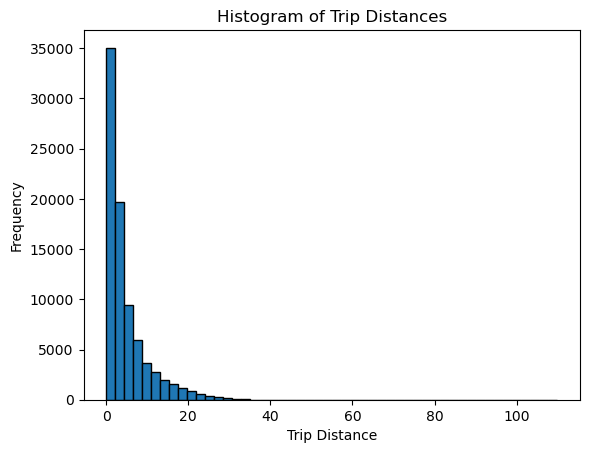

In [95]:
plt.hist(taxi_data['trip_distance'], bins=50, edgecolor='k') 
plt.xlabel('Trip Distance')
plt.ylabel('Frequency')
plt.title('Histogram of Trip Distances')
plt.show()

In [103]:
taxi_data.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1.0,2021-07-01 00:30:52,2021-07-01 00:35:36,0 days 00:04:44,N,1.0,74,168,1.0,1.20,...,0.5,0.5,0.00,0.0,NaN,0.3,7.30,2.0,1.0,0.0
1,2.0,2021-07-01 00:25:36,2021-07-01 01:01:31,0 days 00:35:55,N,1.0,116,265,2.0,13.69,...,0.5,0.5,0.00,0.0,NaN,0.3,43.30,2.0,1.0,0.0
2,2.0,2021-07-01 00:05:58,2021-07-01 00:12:00,0 days 00:06:02,N,1.0,97,33,1.0,0.95,...,0.5,0.5,2.34,0.0,NaN,0.3,10.14,1.0,1.0,0.0
3,2.0,2021-07-01 00:41:40,2021-07-01 00:47:23,0 days 00:05:43,N,1.0,74,42,1.0,1.24,...,0.5,0.5,0.00,0.0,NaN,0.3,7.80,2.0,1.0,0.0
4,2.0,2021-07-01 00:51:32,2021-07-01 00:58:46,0 days 00:07:14,N,1.0,42,244,1.0,1.10,...,0.5,0.5,0.00,0.0,NaN,0.3,8.30,2.0,1.0,0.0


In [105]:
taxi_data.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'trip_duration', 'store_and_fwd_flag', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'passenger_count', 'trip_distance', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'ehail_fee',
       'improvement_surcharge', 'total_amount', 'payment_type', 'trip_type',
       'congestion_surcharge'],
      dtype='object')

In [106]:
taxi_data['price_per_mile']=taxi_data['fare_amount']/taxi_data['trip_distance']

In [107]:
taxi_data.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,price_per_mile
0,1.0,2021-07-01 00:30:52,2021-07-01 00:35:36,0 days 00:04:44,N,1.0,74,168,1.0,1.20,...,0.5,0.00,0.0,NaN,0.3,7.30,2.0,1.0,0.0,5.000000
1,2.0,2021-07-01 00:25:36,2021-07-01 01:01:31,0 days 00:35:55,N,1.0,116,265,2.0,13.69,...,0.5,0.00,0.0,NaN,0.3,43.30,2.0,1.0,0.0,3.067933
2,2.0,2021-07-01 00:05:58,2021-07-01 00:12:00,0 days 00:06:02,N,1.0,97,33,1.0,0.95,...,0.5,2.34,0.0,NaN,0.3,10.14,1.0,1.0,0.0,6.842105
3,2.0,2021-07-01 00:41:40,2021-07-01 00:47:23,0 days 00:05:43,N,1.0,74,42,1.0,1.24,...,0.5,0.00,0.0,NaN,0.3,7.80,2.0,1.0,0.0,5.241935
4,2.0,2021-07-01 00:51:32,2021-07-01 00:58:46,0 days 00:07:14,N,1.0,42,244,1.0,1.10,...,0.5,0.00,0.0,NaN,0.3,8.30,2.0,1.0,0.0,6.363636


In [110]:
trip_per_mile_col=taxi_data.pop('price_per_mile')
taxi_data.insert(11,'price_per_mile', trip_per_mile_col)
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83464 entries, 0 to 83690
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   VendorID               51173 non-null  float64        
 1   lpep_pickup_datetime   83464 non-null  datetime64[ns] 
 2   lpep_dropoff_datetime  83464 non-null  datetime64[ns] 
 3   trip_duration          83464 non-null  timedelta64[ns]
 4   store_and_fwd_flag     51173 non-null  object         
 5   RatecodeID             51173 non-null  float64        
 6   PULocationID           83464 non-null  int64          
 7   DOLocationID           83464 non-null  int64          
 8   passenger_count        51173 non-null  float64        
 9   trip_distance          83464 non-null  float64        
 10  fare_amount            83464 non-null  float64        
 11  price_per_mile         83345 non-null  float64        
 12  extra                  83464 non-null  float64     

In [117]:
taxi_data.tail()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,price_per_mile,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
83686,NaN,2021-07-02 07:59:00,2021-07-02 08:33:00,0 days 00:34:00,NaN,NaN,218,169,NaN,18.04,...,2.784922,2.75,0.0,0.00,6.55,0.3,59.84,NaN,NaN,NaN
83687,NaN,2021-07-02 07:02:00,2021-07-02 07:18:00,0 days 00:16:00,NaN,NaN,74,137,NaN,5.56,...,3.446043,0.00,0.0,3.66,0.00,0.3,25.87,NaN,NaN,NaN
83688,NaN,2021-07-02 07:53:00,2021-07-02 08:15:00,0 days 00:22:00,NaN,NaN,69,75,NaN,5.13,...,4.376218,0.00,0.0,0.00,0.00,0.3,22.75,NaN,NaN,NaN
83689,NaN,2021-07-02 07:58:00,2021-07-02 08:30:00,0 days 00:32:00,NaN,NaN,117,82,NaN,12.58,...,3.864865,2.75,0.0,0.00,2.45,0.3,54.12,NaN,NaN,NaN
83690,NaN,2021-07-02 07:00:00,2021-07-02 07:26:00,0 days 00:26:00,NaN,NaN,218,196,NaN,11.32,...,4.049470,2.75,0.0,0.00,0.00,0.3,48.89,NaN,NaN,NaN


In [120]:
taxi_data['passenger_count'].fillna((taxi_data['passenger_count'].mean()), inplace=True)
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83464 entries, 0 to 83690
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   VendorID               51173 non-null  float64        
 1   lpep_pickup_datetime   83464 non-null  datetime64[ns] 
 2   lpep_dropoff_datetime  83464 non-null  datetime64[ns] 
 3   trip_duration          83464 non-null  timedelta64[ns]
 4   store_and_fwd_flag     51173 non-null  object         
 5   RatecodeID             51173 non-null  float64        
 6   PULocationID           83464 non-null  int64          
 7   DOLocationID           83464 non-null  int64          
 8   passenger_count        83464 non-null  float64        
 9   trip_distance          83464 non-null  float64        
 10  fare_amount            83464 non-null  float64        
 11  price_per_mile         83345 non-null  float64        
 12  extra                  83464 non-null  float64     

In [121]:
taxi_data['payment_type'].value_counts()

payment_type
1.0    29990
2.0    20831
3.0      307
4.0       44
5.0        1
Name: count, dtype: int64

In [124]:
taxi_data['payment_type'].fillna(5, inplace=True) #from trip data dictonary 5=uknown
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83464 entries, 0 to 83690
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   VendorID               51173 non-null  float64        
 1   lpep_pickup_datetime   83464 non-null  datetime64[ns] 
 2   lpep_dropoff_datetime  83464 non-null  datetime64[ns] 
 3   trip_duration          83464 non-null  timedelta64[ns]
 4   store_and_fwd_flag     51173 non-null  object         
 5   RatecodeID             51173 non-null  float64        
 6   PULocationID           83464 non-null  int64          
 7   DOLocationID           83464 non-null  int64          
 8   passenger_count        83464 non-null  float64        
 9   trip_distance          83464 non-null  float64        
 10  fare_amount            83464 non-null  float64        
 11  price_per_mile         83345 non-null  float64        
 12  extra                  83464 non-null  float64     

In [128]:
taxi_data['RatecodeID'].value_counts()

RatecodeID
1.0    48994
5.0     1954
2.0      158
4.0       41
3.0       26
Name: count, dtype: int64

In [127]:
numeric_cols.corr()

,VendorID,RatecodeID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
VendorID,1.000000,0.014928,0.060150,0.082298,0.029182,-0.286012,-0.019667,0.034750,0.009435,0.056338,0.036012,-0.018243,0.017484,0.024630
RatecodeID,0.014928,1.000000,-0.011341,0.031996,0.088569,-0.110949,-0.831250,0.022597,0.020488,-0.160322,0.069584,0.030029,0.931866,-0.087444
passenger_count,0.060150,-0.011341,1.000000,-0.011429,-0.022654,0.027596,0.011960,-0.000517,-0.012416,0.012199,-0.017224,0.010686,-0.007389,0.037350
trip_distance,0.082298,0.031996,-0.011429,1.000000,0.872787,0.021185,0.014355,0.195517,0.576845,-0.005080,0.873364,-0.157594,0.006977,0.065142
fare_amount,0.029182,0.088569,-0.022654,0.872787,1.000000,0.000818,-0.017490,0.179077,0.539509,0.104803,0.978672,-0.210367,0.057113,0.032542
extra,-0.286012,-0.110949,0.027596,0.021185,0.000818,1.000000,0.126704,0.088806,-0.031271,0.069939,0.047036,-0.051714,-0.108189,0.246020
mta_tax,-0.019667,-0.831250,0.011960,0.014355,-0.017490,0.126704,1.000000,0.008383,0.001840,0.575599,0.004607,-0.099800,-0.820431,0.095470
tip_amount,0.034750,0.022597,-0.000517,0.195517,0.179077,0.088806,0.008383,1.000000,0.096776,0.044613,0.350139,-0.437211,0.010731,0.264147
tolls_amount,0.009435,0.020488,-0.012416,0.576845,0.539509,-0.031271,0.001840,0.096776,1.000000,-0.013925,0.587852,-0.116026,-0.003361,-0.065581
improvement_surcharge,0.056338,-0.160322,0.012199,-0.005080,0.104803,0.069939,0.575599,0.044613,-0.013925,1.000000,0.112252,-0.167688,-0.161719,0.053168


In [131]:
taxi_data['trip_type'].value_counts()

trip_type
1.0    49413
2.0     1760
Name: count, dtype: int64

In [133]:
taxi_data['trip_type'].fillna(1, inplace = True)
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83464 entries, 0 to 83690
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   VendorID               51173 non-null  float64        
 1   lpep_pickup_datetime   83464 non-null  datetime64[ns] 
 2   lpep_dropoff_datetime  83464 non-null  datetime64[ns] 
 3   trip_duration          83464 non-null  timedelta64[ns]
 4   store_and_fwd_flag     51173 non-null  object         
 5   RatecodeID             51173 non-null  float64        
 6   PULocationID           83464 non-null  int64          
 7   DOLocationID           83464 non-null  int64          
 8   passenger_count        83464 non-null  float64        
 9   trip_distance          83464 non-null  float64        
 10  fare_amount            83464 non-null  float64        
 11  price_per_mile         83345 non-null  float64        
 12  extra                  83464 non-null  float64     

In [134]:
taxi_data['congestion_surcharge'].value_counts()

congestion_surcharge
 0.00    39205
 2.75    11962
-2.75        3
 2.50        3
Name: count, dtype: int64

In [136]:
numeric_cols.corr() #congestion surcharge not correlated to any other feature replace with 0

,VendorID,RatecodeID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
VendorID,1.000000,0.014928,0.060150,0.082298,0.029182,-0.286012,-0.019667,0.034750,0.009435,0.056338,0.036012,-0.018243,0.017484,0.024630
RatecodeID,0.014928,1.000000,-0.011341,0.031996,0.088569,-0.110949,-0.831250,0.022597,0.020488,-0.160322,0.069584,0.030029,0.931866,-0.087444
passenger_count,0.060150,-0.011341,1.000000,-0.011429,-0.022654,0.027596,0.011960,-0.000517,-0.012416,0.012199,-0.017224,0.010686,-0.007389,0.037350
trip_distance,0.082298,0.031996,-0.011429,1.000000,0.872787,0.021185,0.014355,0.195517,0.576845,-0.005080,0.873364,-0.157594,0.006977,0.065142
fare_amount,0.029182,0.088569,-0.022654,0.872787,1.000000,0.000818,-0.017490,0.179077,0.539509,0.104803,0.978672,-0.210367,0.057113,0.032542
extra,-0.286012,-0.110949,0.027596,0.021185,0.000818,1.000000,0.126704,0.088806,-0.031271,0.069939,0.047036,-0.051714,-0.108189,0.246020
mta_tax,-0.019667,-0.831250,0.011960,0.014355,-0.017490,0.126704,1.000000,0.008383,0.001840,0.575599,0.004607,-0.099800,-0.820431,0.095470
tip_amount,0.034750,0.022597,-0.000517,0.195517,0.179077,0.088806,0.008383,1.000000,0.096776,0.044613,0.350139,-0.437211,0.010731,0.264147
tolls_amount,0.009435,0.020488,-0.012416,0.576845,0.539509,-0.031271,0.001840,0.096776,1.000000,-0.013925,0.587852,-0.116026,-0.003361,-0.065581
improvement_surcharge,0.056338,-0.160322,0.012199,-0.005080,0.104803,0.069939,0.575599,0.044613,-0.013925,1.000000,0.112252,-0.167688,-0.161719,0.053168


In [137]:
taxi_data['congestion_surcharge'].fillna(0, inplace=True)
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83464 entries, 0 to 83690
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   VendorID               51173 non-null  float64        
 1   lpep_pickup_datetime   83464 non-null  datetime64[ns] 
 2   lpep_dropoff_datetime  83464 non-null  datetime64[ns] 
 3   trip_duration          83464 non-null  timedelta64[ns]
 4   store_and_fwd_flag     51173 non-null  object         
 5   RatecodeID             51173 non-null  float64        
 6   PULocationID           83464 non-null  int64          
 7   DOLocationID           83464 non-null  int64          
 8   passenger_count        83464 non-null  float64        
 9   trip_distance          83464 non-null  float64        
 10  fare_amount            83464 non-null  float64        
 11  price_per_mile         83345 non-null  float64        
 12  extra                  83464 non-null  float64     

In [139]:
taxi_data["RatecodeID"].value_counts()

RatecodeID
1.0    48994
5.0     1954
2.0      158
4.0       41
3.0       26
Name: count, dtype: int64

In [140]:
taxi_data["mta_tax"].value_counts()

mta_tax
 0.5    49269
 0.0    34063
-0.5      132
Name: count, dtype: int64